# <center><font color='OrangeRed'>Прогнозирование оттока клиентов сети фитнес-центров "Культурист-датасаентист"</font></center>

Мною будет подготовлен аналитическое исследование анкет клиентов фитнес-центра с целью спрогнозировать отток посетителей и разработать план по его снижению 

*Исходные данные* для моего исследования:
 - датафрейм с информацией о посетителях фитнес-центра
 
В него входит следующая информация:
 - **Churn** - факт оттока в текущем месяце;
 - **Gender** - пол;
 - **Near_Location** - проживание или работа в районе, где находится фитнес-центр;
 - **Partner** - сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
 - **Promo_friends** - факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
 - **Phone** - наличие контактного телефона;
 - **Age** - возраст;
 - **Lifetime** - время с момента первого обращения в фитнес-центр (в месяцах);
 - **Contract_period** - длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
 - **Month_to_end_contract** - срок до окончания текущего действующего абонемента (в месяцах);
 - **Group_visits** - факт посещения групповых занятий;
 - **Avg_class_frequency_total** - средняя частота посещений в неделю за все время с начала действия абонемента;
 - **Avg_class_frequency_current_month** - редняя частота посещений в неделю за предыдущий месяц;
 - **Phone** - наличие контактного телефона;
 - **Avg_additional_charges_total** - суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.
 
Исследование будет построено из следующих *этапов*:

   1. [Предобработка данных](#obzor)
   2. [Исследовательский анализ данных (EDA)](#eda)
   3. [Модель прогнозирования оттока клиентов](#model)
   4. [Кластеризация клиентов](#klast)
   5. [Общий вывод](#vyvod)
   6. [Рекомендации для сотрудников фитнес-центра](#recomend)

# <a id="obzor"></a><font style="background-color: Cyan; color=black">1. Предобработка данных</font> #

In [1]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

import seaborn as sns; sns.set()
sns.set(rc={'figure.figsize':(12, 10)})

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

pd.options.display.max_colwidth = 100000
pd.options.display.max_rows = 600

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
df.sample(n=10, random_state=0)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2230,0,1,1,1,1,12,1,29,260.507459,12.0,2,2.348167,2.323455,0
668,0,0,0,0,1,1,1,27,48.087954,1.0,0,1.003281,0.728397,1
3616,0,0,1,0,1,6,0,30,24.620589,5.0,2,0.000000,0.000000,0
2363,1,1,0,0,1,1,1,27,139.893107,1.0,0,2.322132,1.838436,1
142,1,0,1,0,0,12,0,29,89.657794,12.0,1,3.521502,3.368137,0
538,1,1,1,0,1,12,1,26,169.933317,12.0,4,1.118238,1.141879,0
1791,1,0,0,0,1,1,0,34,224.208611,1.0,2,3.317759,3.386540,0
410,0,1,0,0,1,12,0,35,204.911058,12.0,2,2.708949,2.715933,0
1150,0,1,0,0,1,1,0,27,93.006365,1.0,1,1.777851,2.347247,1
1032,1,1,0,1,1,1,0,32,161.676880,1.0,5,1.917288,1.979258,0


In [3]:
display(f'Количество дубликатов: {df.duplicated().sum()}')

'Количество дубликатов: 0'

In [4]:
print('Информация о датафрейме')
df.info()

Информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


В датафрейме:
- 4 000 строк;
- 14 столбцов.

Типы данных у столбцов:
- float64;
- uint64. 

Наименования столбцов содержат буквы в *верхнем регистре* (переименую). Пропуски данных и дубликаты *отсутствуют*.

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Названия столбцов приведены к единому формату.

# <a id="eda"></a><font style="background-color: Cyan; color=black">2. Исследовательский анализ данных (EDA)</font> #

<font color='blue'>Средние значения и стандартные отклонения</font>

Изучу информацию о датафрейме

In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,4000.0,0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,4000.0,0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,4000.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,4000.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,4000.0,4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,4000.0,0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,4000.0,29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,4000.0,146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,4000.0,4.32,4.19,1.00,1.00,1.00,6.00,12.00


# <font color='red'>Вывод</font> #

Распределение по полу: **51% на 49%** - примерно *одинаковое количество женщин и мужчин* посещают фитнес-центры.

Около **85%** клиентов живет или работает *рядом с фитнес-центром*.

Почти **49%** клиентов являются *сотрудниками компаний-партнеров сети фитнес-центров*.

Почти **31%** клиентов оплатили первый абонемент *по промокоду* от знакомого, в рамках программы "Приведи друга".

**90%** клиентов оставили контактные номера телефонов.

*Длительность текущего действующего абонемента* клиента в среднем равна **4.68 месяцев**, стандартное отклонение - **4,55**(учитывая наличие разных типов абонементов - на 1 месяц, на 3 и 6 месяцев, на год - вполне логичный остаточный срок)

Около **41%** клиентов посещали *групповые занятия*.

*Средний возраст* клиентов - **29 лет**.

Стандартное отклонение **3,25** наблюдается в информации о возрасте клиентов. Заметный разброс возрастов. Однако показатель в целом небольшой, скорее всего возрастные категории клиентов фитнес-центров охватывают только активный работоспособный возраст.

Средние *суммарные траты на дополнительные услуги* - **146.94**. Стандартное отклонение - **96,36** - большое значение. Наверняка имеются выбросы, но и это легко объяснимо, так как во всех фитнес-центрах встречаются любители не только тренировок, но и те, кто охотно посидит в кафе, сходит в салон-красоты и оставит круглую сумму.

*Срок до окончания текущего действующего абонемента* в среднем **4,3 месяцев**, стандартное отклонение - **4,19** - имеется заметный разброс значений (от 1 до 12 месяцев, вероятно).

*Время с момента первого обращения в фитнес-центр* в среднем - **3.7 месяцев**, стандартное отклонение - **3,75** - имеется заметный разброс значений.

*Средняя частота посещений за время с начала действия абонемента* - **1.88** раз в неделю, стандартное отклонение - **0,97**. Большинство клиентов посещают фитнес- центр не более 2 раз в неделю (распространенная практика для фитнес-центров).

*Средняя частота посещений за предыдущий месяц* - **1.76** раз в неделю, стандартное отклонение равно **1,05** - в сравнении с частотой посещений за все время оно выше, разброс значений больше.

*Доля оттока* клиентов в текущем месяце в среднем **27%**.

<font color='blue'>Средние значения признаков по группам</font>

Здесь и далее:

Ушли в отток - **1**

Остались - **0**

In [7]:
df1 = df.groupby('churn').agg('mean').T
df1

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


# <font color='red'>Вывод</font> #

Распределение *по полу* в двух группах (ушли в отток / остались) практически одинаковое - **51% на 49%**.

В группе *оттока* процент клиентов, которые *живут или работает рядом с фитнес-центром* на **11 % ниже**, чем в группе оставшихся клиентов, что логично.

Процент клиентов, *котрые являются сотрудниками компаний-партнеров* сети фитнес-центров в группе *оттока* заметно **ниже**, чем в группе оставшихся **35,5%** и **53%** соответственно (возможно, для партнеров действуют скидки).

В группе *оттока* только **18%** клиентов пришли в фитнес-центры *по программе "Приведи друга"*, в группе оставшихся процент участников программы выше почти в два раза - **35%**.

*Контактные номера телефонов* оставлены в двух группах на **одном уровне - у 90 % клиентов**.

*Длительность текущего действующего абонемента* клиента из группы оставшихся в среднем равна **5,7 месяцев**, в группе *оттока* значительно **ниже - 1,7 месяцев** (можно предположить, что клиенты, которые уходят сомневаются в том, что будут ходить много и долго, и изначально не берут абонементы на год, или даже на пол года).

В группе оставшихся **46%** клиентов посещали *групповые занятия*, в группе оттока - только **26%**.

*Средний возраст клиентов* в группе *оставшихся* около **30 лет**, клиенты в группе *оттока* моложе - в среднем около **27 лет**.

Каждый клиент в среднем *суммарно тратит на дополнительные услуги* фитнес-центров в группе *оставшихся* около **158**, в группе *оттока* - **115**.

*Срок до окончания текущего действующего абонемента* в группе *оставшихся* в среднем **5,3 месяца**, в группе *оттока* - **1,7 месяцев** (клиенты уходят даже не использовав абонемент в полном объеме).

Время *с момента первого обращения в фитнес-центр* в группе *оставшихся* в среднем **4,7 месяцев**, в группе *оттока* - около **1 месяца** (клиенты не выдерживают даже месяц. Вероятно, попробовали - не понравилось, слабая мотивация, абонемент подарили или отдали).

*Средняя частота посещений* за время с начала действия абонемента в группе *оставшихся* выше **2**, чем в группе *оттока* **1,47** раз в неделю.

<font color='blue'>Распределение признаков по группам</font>

Для удобство чтения и восприятия информации, переименую столбцы

In [8]:
df.columns = ['Пол', 'Проживание или работа в районе фитнес-центра', 'Участие в программе "Партнер клуба"', 'Участие в акции "Приведи друга"', 'Наличие контактного телефона клиента',
       'Длительность текущего действующего абонемента, мес.', 'Посещение групповых занятий', 'Возраст',
       'Суммарная выручка  от доп.услуг фитнес-центра', 'Срок до окончания текущего действующего абонемента, мес.', 'Время с момента первого обращения в фитнес-центр, мес.',
       'Средняя частота посещений в неделю с начала действия абонемента', 'Средняя частота посещений в неделю за предыдущий месяц',
       'Факт оттока клиентов в текущем месяце']

Визуализирую распределение признаков в двух группах: *клиентов оттока* и *оставшихся клиентов*.

Для ряда признаков построю *плотностные гистограммы*.

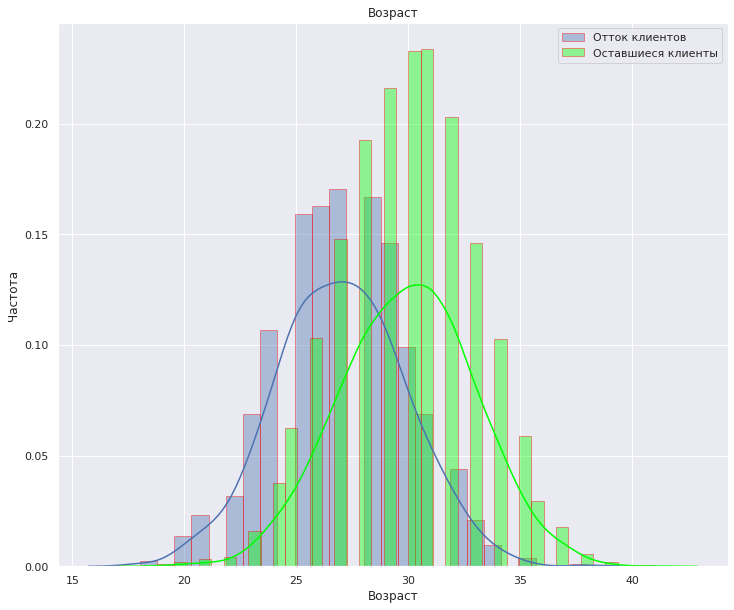

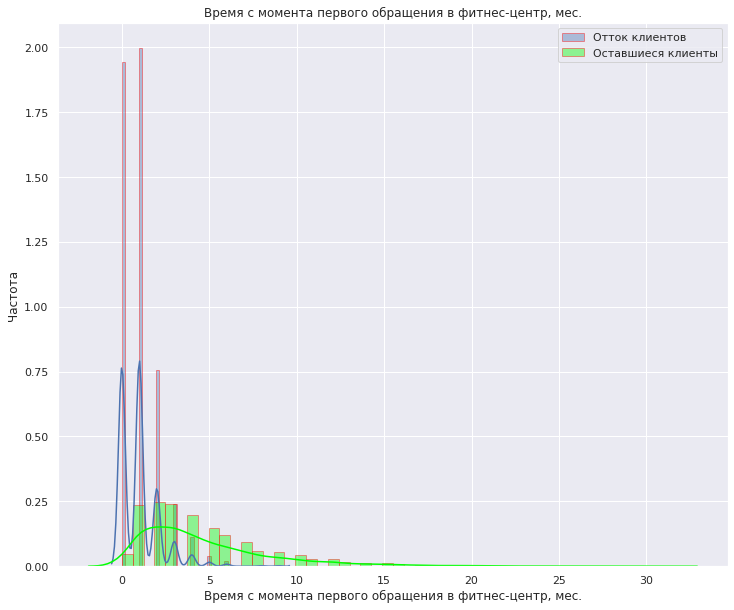

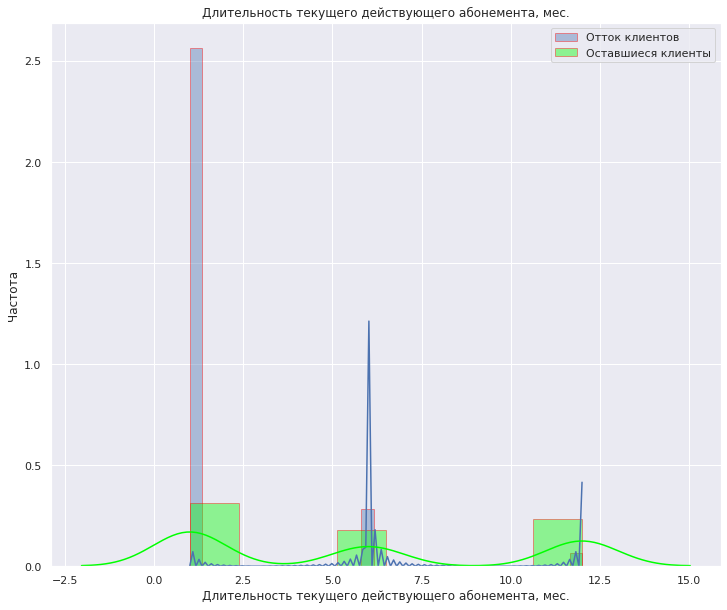

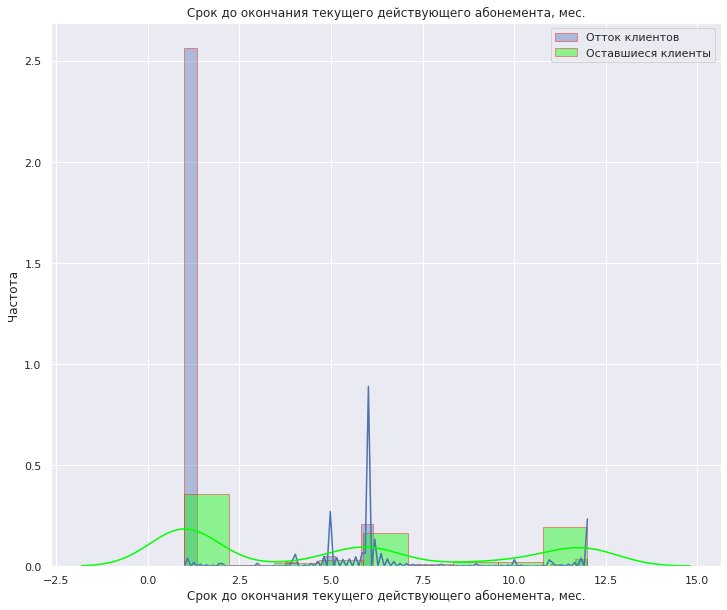

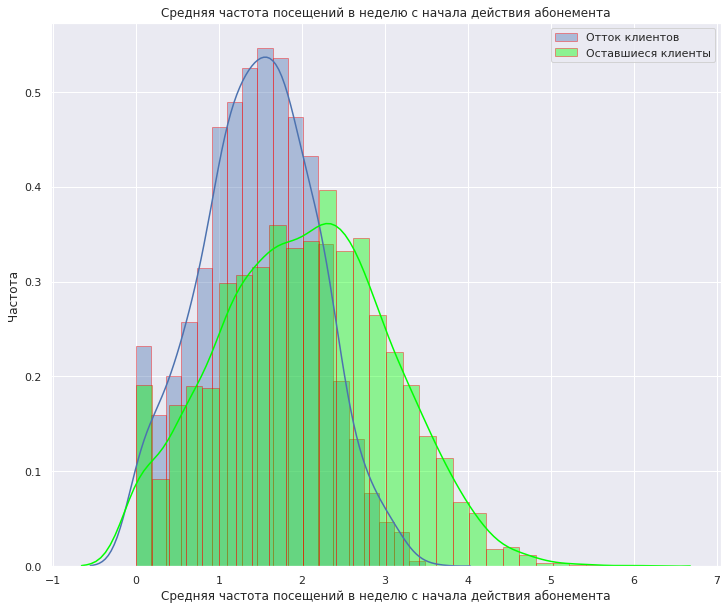

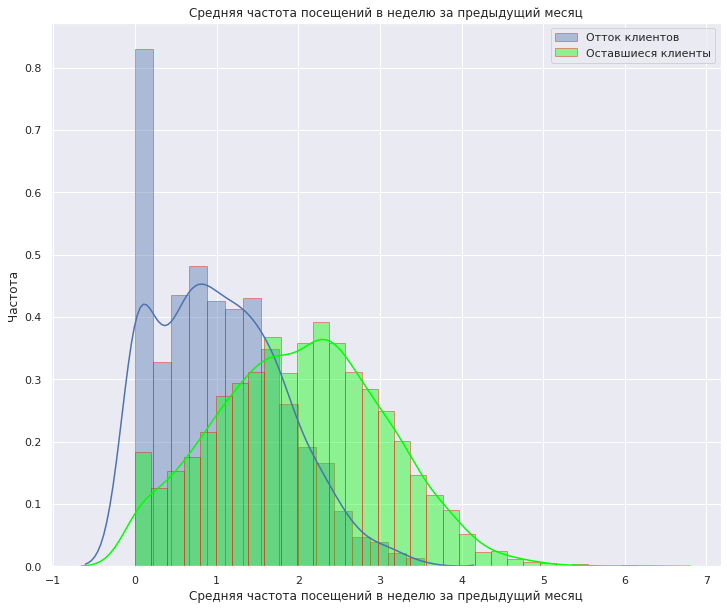

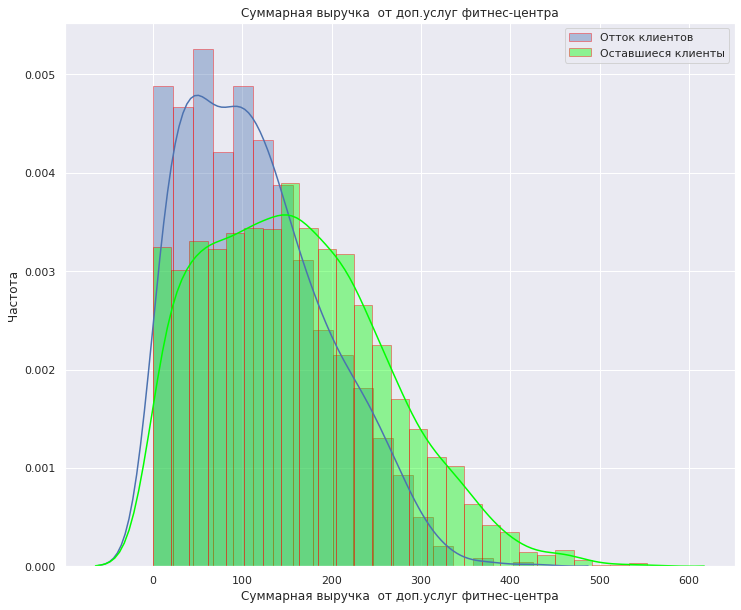

In [9]:
outflow = df[df['Факт оттока клиентов в текущем месяце']==1]
remained = df[df['Факт оттока клиентов в текущем месяце']==0]
distplot_columns = ['Возраст', 'Время с момента первого обращения в фитнес-центр, мес.',
                    'Длительность текущего действующего абонемента, мес.','Срок до окончания текущего действующего абонемента, мес.',
                    'Средняя частота посещений в неделю с начала действия абонемента', 'Средняя частота посещений в неделю за предыдущий месяц',
                    'Суммарная выручка  от доп.услуг фитнес-центра']

for column in distplot_columns:  
  plt.title(column)
  plt.xlabel(column)
  plt.ylabel('Частота')  
  sns.distplot(outflow[column], hist_kws = {'edgecolor': 'red'})
  sns.distplot(remained[column], color = "lime", hist_kws = {'edgecolor': 'red'})
  plt.legend(['Отток клиентов', 'Оставшиеся клиенты'])
  plt.show()

# <font color='red'>Вывод</font> #

<font color='green'>**Возраст**</font>

- *Отток клиентов*: распределение от **18 до 36 лет**, большинство клиентов в возрасте **25 - 30 лет**
- *Оставшиеся клиенты*: распределение от **21 до 38 лет**, большинство клиентов в возрасте **27 - 33 лет**.

<font color='green'>**Время с момента первого обращения в фитнес-центр, мес**</font>

- *Отток клиентов*: распределение от нескольких дней **(около 20) до 6 месяцев**, единично - **до 9 месяцев**, большинство клиентов - **от 0 до 3 месяцев**
- *Оставшиеся клиенты*: распределение от **0 до 15 месяцев**, единично - **до 33 месяцев**, большинство клиентов - от **0 до 5 месяцев**.

<font color='green'>**Длительность текущего действующего абонемента**</font>

- *Отток клиентов*: распределение абонементов - **1, 6, 12 месяцев**, большинство клиентов имеют абонемент на **1 месяц**
- *Оставшиеся клиенты*: распределение абонементов в близком диапазоне - **1, 6, 12 месяцев**, большинство клиентов имеют абонемент на **1 и 12 месяцев**.

<font color='green'>**Срок до окончания текущего действующего абонемента, мес.**</font>

- *Отток клиентов*: распределение от **1 до 12 месяцев**, у большинства клиентов срок окончания абонемента около **1 месяца**
- *Оставшиеся клиенты*: распределение от **1 до 12 месяцев**, у большинства клиентов срок окончания абонемента около **1 или 11 месяцев**

<font color='green'>**Средняя частота посещений в неделю с начала действия абонемента**</font>

- *Отток клиентов*: распределение от **0 до 3 раз (очень редко чаще)**, большинство клиентов в среднем посещают фитнес-центр **1,5 - 1,7 раз в неделю**
- *Оставшиеся клиенты*: распределение от **0 до 5 раз (очень редко чаще)**, большинство клиентов в среднем посещают фитнес-центр **1,5 - 2,8 раз в неделю**.

<font color='green'>**Средняя частота посещений в неделю за предыдущий месяц**</font>

- *Отток клиентов*: распределение от **0 до 3 раз (редко чаще)**, большинство клиентов за предыдущий месяц в среднем посещали фитнес-центр **1 раз в неделю**
- *Оставшиеся клиенты*: распределение от **0 до 5 раз** (очень редко чаще), большинство клиентов за предыдущий месяц в среднем посещали фитнес-центр **1-3 раза в неделю**

<font color='green'>**Суммарная выручка от доп.услуг фитнес-центра**</font>

- *Отток клиентов*: распределение от **0 до 300 (редко больше)**, большинство клиентов принесли в среднем выручку по дополнительным услугам от **0 до 150**.
- *Оставшиеся клиенты*: распределение от **0 до 500 (редко больше)**, большинство клиентов принесли в среднем выручку по дополнительным услугам от **0 до 200**.

Визуализирую распределение признаков в двух группах: *клиентов оттока* и *оставшихся клиентов*.

Для ряда признаков построю *столбчатые гистограммы*.

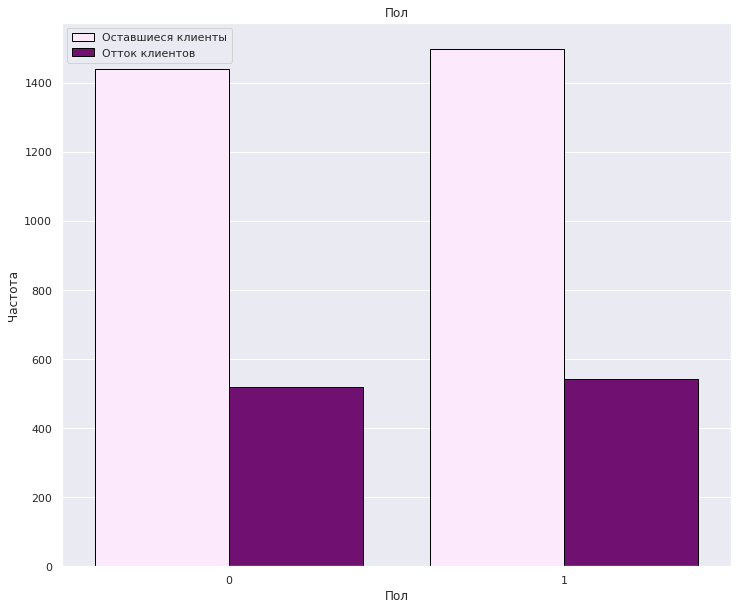

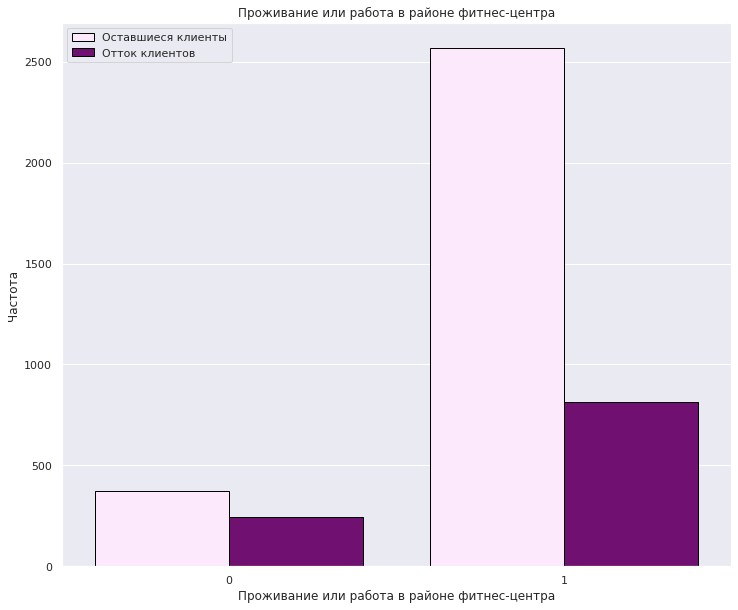

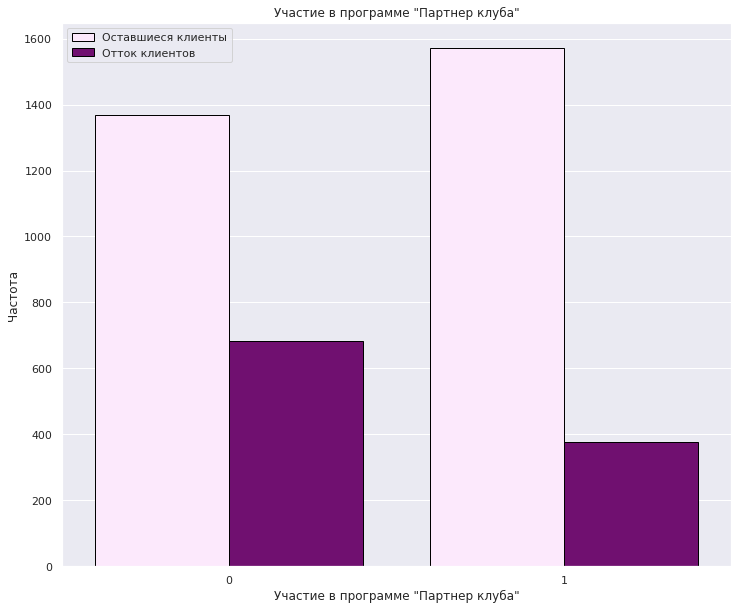

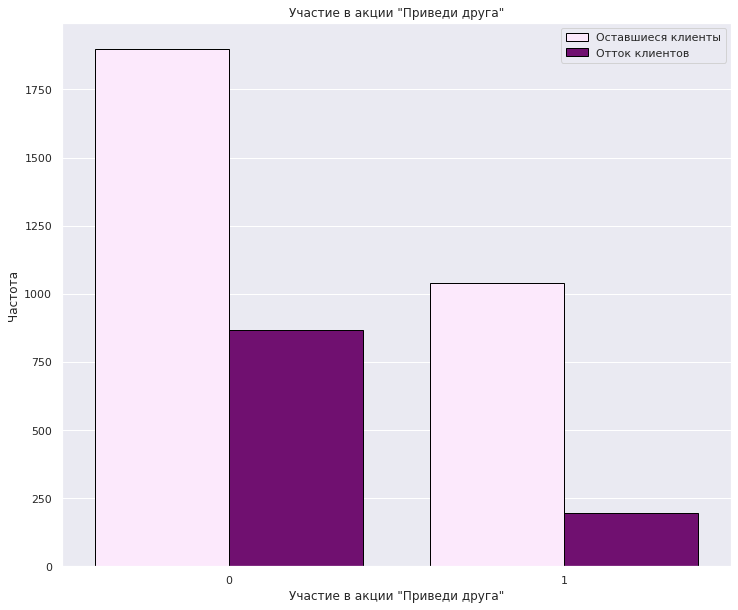

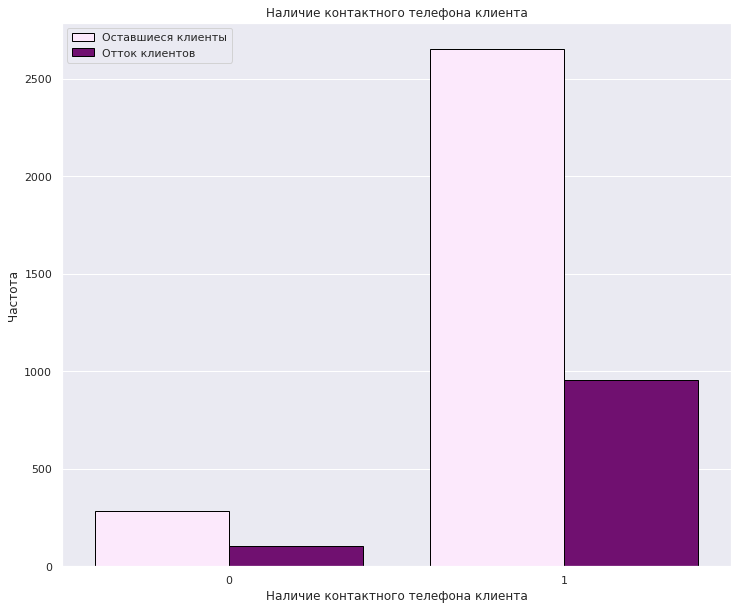

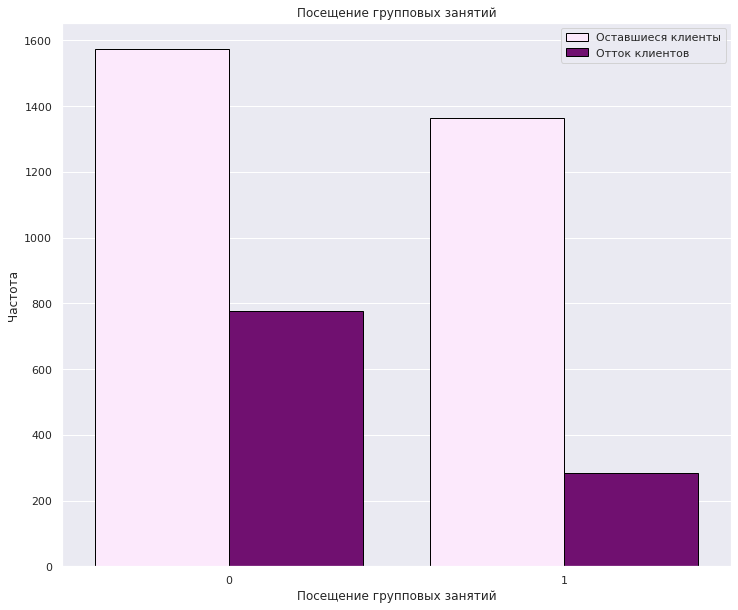

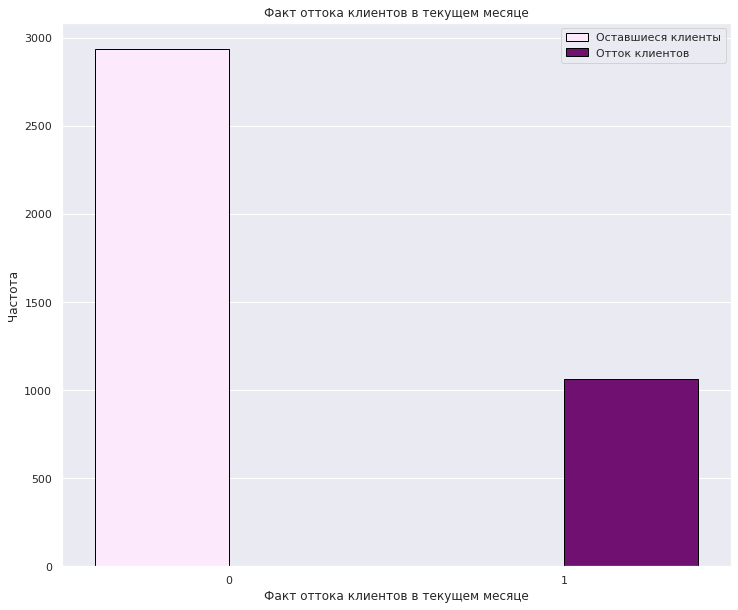

In [10]:
for column in df.columns:
  if column not in distplot_columns:
    df.groupby('Факт оттока клиентов в текущем месяце')[column]
    sns.countplot(x = df[column], hue='Факт оттока клиентов в текущем месяце', data=df, ec='black', color='purple')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Частота') 
    plt.legend(['Оставшиеся клиенты','Отток клиентов'])
    plt.show()

# <font color='red'>Вывод</font> #

<font color='green'>**Пол**</font>

Распределение по полу примерно **одинаково** в обеих группах

<font color='green'>**Факт проживания или работы в районе фитнес- центра**</font>

**Абсолютное большинство** клиентов в обеих группах проиживают или работают в районе фитнес- центра

<font color='green'>**Факт участия в программе "Партнер клуба**</font>

*Большинство* участников программы "Партнер клуба" в группе **оставшихся** клиентов

<font color='green'>**Факт участия в акции "Приведи друга"**</font>

*Большинство* участников акции "Приведи друга" в группе **оставшихся** клиентов

<font color='green'>**Факт наличия контактного телефона клиента**</font>

В обеих группах большинство клиентов **оставляют** свой контактный телефон

<font color='green'>**Факт посещения групповых занятий**</font>

Из клиентов, посещающих групповые занятия, *большинство* в группе **оставшихся**

<font color='green'>**Факт оттока клиентов в текущем месяце**</font>

*Чуть менее 1/3 части* клиентов попала в группу **оттока**

<font color='blue'>Матрица корреляции признаков</font>

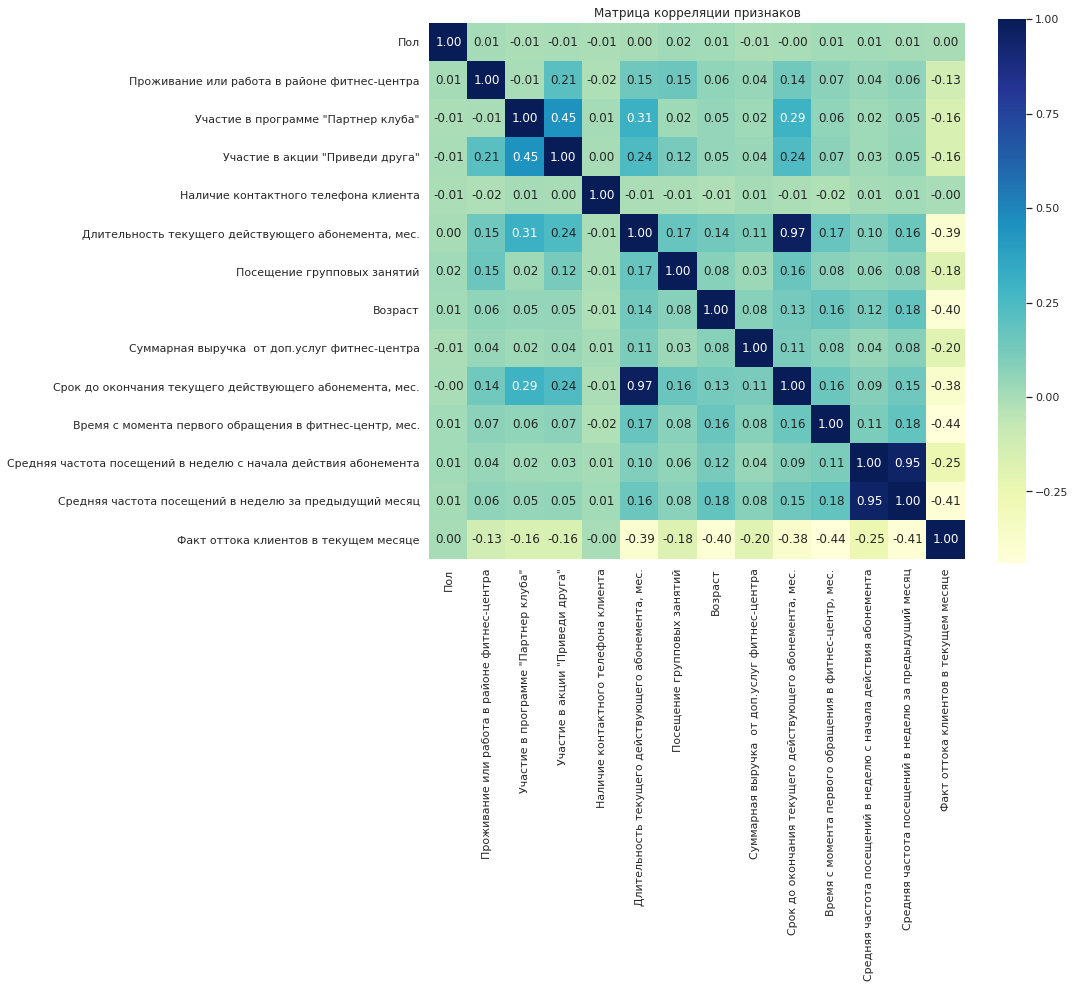

In [11]:
sns.heatmap(data = df.corr(), annot=True, square=True, cmap='YlGnBu', fmt='0.2f', )
plt.title('Матрица корреляции признаков')
plt.show()

# <font color='red'>Вывод</font> #

**Целевая переменная (факт оттока)** очень слабо *отрицательно коррелирует* с половиной признаков, с признаками "Пол" и "Контактный телефон" корреляция *нулевая*, заметная *отрицательная корреляция* (возрастание значений признака приводит к снижению оттока) с целевой переменной имеется у следующих признаков:

- *Длительность текущего действующего абонемента, мес.*, корреляция равна - **0,39**
- *Возраст*, корреляция равна - **0,40**
- *Срок до окончания текущего действующего абонемента, мес.*, корреляция равна - **0,38**
- *Время с момента первого обращения в фитнес- центр, мес.*, корреляция равна - **0,44**
- *Средняя частота посещений в неделю за предыдущий месяц*, корреляция равна - **0,41**

Выявлены **мультиколлинеарные** признаки:

- корреляция между ними равна **0,97** - *Длительность текущего действующего абонемента, мес.* (contract_period) и *Срок до окончания текущего действующего абонемента, мес.* (month_to_end_contact);
- корреляция между ними равна **0,95** - *Средняя частота посещений в неделю с начала действия абонемента*(avg_class_frequency_current_month) и *Средняя частота посещений в неделю за предыдущий месяц* (avg_class_frequency_total).

# <a id="model"></a><font style="background-color: Cyan; color=black">3. Модель прогнозирования оттока клиентов</font> #

Модель бинарной классификации пользователей, где *целевая переменная* - факт оттока пользователя в следующем месяце.

<font color='blue'>Обучающая и валидационная выборки, функция train_test_split()</font>

Данные разделю на признаки *(матрица X)* и целевую переменную *(y)*, мультиколлинеарные признаки оставляю (корреляция всё же *не равна 1*)

In [12]:
X = df.drop('Факт оттока клиентов в текущем месяце', axis = 1)
y = df['Факт оттока клиентов в текущем месяце']

Обучающая и валидационная выборки

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head()

,Пол,Проживание или работа в районе фитнес-центра,"Участие в программе ""Партнер клуба""","Участие в акции ""Приведи друга""",Наличие контактного телефона клиента,"Длительность текущего действующего абонемента, мес.",Посещение групповых занятий,Возраст,Суммарная выручка от доп.услуг фитнес-центра,"Срок до окончания текущего действующего абонемента, мес.","Время с момента первого обращения в фитнес-центр, мес.",Средняя частота посещений в неделю с начала действия абонемента,Средняя частота посещений в неделю за предыдущий месяц
1161,0,1,1,1,1,12,0,31,183.340029,11.0,8,3.590505,3.473680
2355,0,1,0,0,1,1,0,30,40.559417,1.0,26,1.663034,1.750301
1831,1,1,1,0,1,12,0,27,32.123604,12.0,5,1.060272,0.913766
156,0,1,1,1,1,6,0,26,54.694211,6.0,9,2.531159,2.446842
195,0,1,0,0,0,1,0,29,241.701674,1.0,4,1.690380,1.595065


<font color='blue'>Логистическая регрессия</font>

Нормализую данные. Обучу модель на нормализованной обучающей выборке двумя способами: *логистической регрессией* и *случайным лесом*.

Оцениваю метрики *accuracy*, *precision* и *recall* для обеих моделей на валидационной выборке. Буду сравнивать по ним модели.

**Метрики**:

*accuracy* - *Доля правильных ответов* - доля верно угаданных ответов из всех прогнозов, чем ближе значение accuracy к 100%, тем лучше;

*precision* - *Точность* - доля правильных ответов модели в пределах класса — это доля объектов действительно принадлежащих данному классу относительно всех объектов которые система отнесла к этому классу, введение precision не позволяет записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive (аналогична ошибке I-го рода)

*recall* - *Полнота* - доля истинно положительных классификаций, показывает, какую долю объектов, реально относящихся к положительному классу, предсказал верно.

Для нормализации данных исключаю из датафрейма столбцы с Булевой логикой

In [14]:
list_of_columns = ['Длительность текущего действующего абонемента, мес.', 'Возраст', 
                   'Суммарная выручка  от доп.услуг фитнес-центра', 'Срок до окончания текущего действующего абонемента, мес.',
                   'Время с момента первого обращения в фитнес-центр, мес.', 
                   'Средняя частота посещений в неделю с начала действия абонемента', 
                   'Средняя частота посещений в неделю за предыдущий месяц']

Создам объект класса *StandardScaler* и применю его к обучающей выборке.

Затем обучу *scaler* и одновременно нормализую выборочно столбцы обучающей выборки.

Применю выборочную стандартизацию к матрице признаков для валидационной (тестовой) выборки.

In [15]:
scaler = StandardScaler()
X_train[list_of_columns] = scaler.fit_transform(X_train[list_of_columns])
X_test[list_of_columns] = scaler.transform(X_test[list_of_columns])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [16]:
X_train.head()

,Пол,Проживание или работа в районе фитнес-центра,"Участие в программе ""Партнер клуба""","Участие в акции ""Приведи друга""",Наличие контактного телефона клиента,"Длительность текущего действующего абонемента, мес.",Посещение групповых занятий,Возраст,Суммарная выручка от доп.услуг фитнес-центра,"Срок до окончания текущего действующего абонемента, мес.","Время с момента первого обращения в фитнес-центр, мес.",Средняя частота посещений в неделю с начала действия абонемента,Средняя частота посещений в неделю за предыдущий месяц
1161,0,1,1,1,1,1.605030,0,0.579448,0.371617,1.591738,1.127350,1.755804,1.618228
2355,0,1,0,0,1,-0.812991,0,0.270461,-1.096974,-0.795682,5.881383,-0.223967,-0.013409
1831,1,1,1,0,1,1.605030,0,-0.656502,-1.183742,1.830480,0.335011,-0.843085,-0.805412
156,0,1,1,1,1,0.286110,0,-0.965489,-0.951588,0.398028,1.391463,0.667714,0.646052
195,0,1,0,0,0,-0.812991,0,-0.038527,0.971904,-0.795682,0.070898,-0.195879,-0.160381


- Задаю алгоритм для модели;
- Обучаю модель;
- Применю обученную моделью, чтобы сделать прогнозы;
- Рассчитаю и выведу метрики для модели, обученной способом логистической регрессии.

In [17]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
print('Метрики для модели логистической регрессии:')

print('Доля правильных ответов (Accuracy): {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Точность (Precision): {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Полнота (Recall): {:.2f}'.format(recall_score(y_test, lr_predictions)))

Метрики для модели логистической регрессии:
Доля правильных ответов (Accuracy): 0.93
Точность (Precision): 0.86
Полнота (Recall): 0.83


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<font color='blue'>Случайный лес</font>

- Задаю алгоритм для модели;
- Обучаю модель;
- Применю обученную моделью, чтобы сделать прогнозы;
- Рассчитаю и выведу метрики для модели, обученной способом случайного леса.

In [18]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
print('Метрики для модели случайного леса:')

print('Доля правильных ответов (Accuracy): {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Точность (Precision): {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Полнота (Recall): {:.2f}'.format(recall_score(y_test, rf_predictions)))

Метрики для модели случайного леса:
Доля правильных ответов (Accuracy): 0.92
Точность (Precision): 0.84
Полнота (Recall): 0.81


Рассчитанные метрики *выше* в моделе, обученной способом **логистической регрессии** - данная модель показала лучший результат.

# <a id="klast"></a><font style="background-color: Cyan; color=black">4. Кластеризация данных</font> #

<font color='blue'>Стандартизация данных. Матрица расстояний</font>

Обучаю scaler и одновременно нормализую выборочно столбцы с признаками

In [19]:
X[list_of_columns] = scaler.fit_transform(X[list_of_columns])
linked = linkage(X, method='ward')

<font color='blue'>Дендрограммма. Алгоритм K-Means</font>

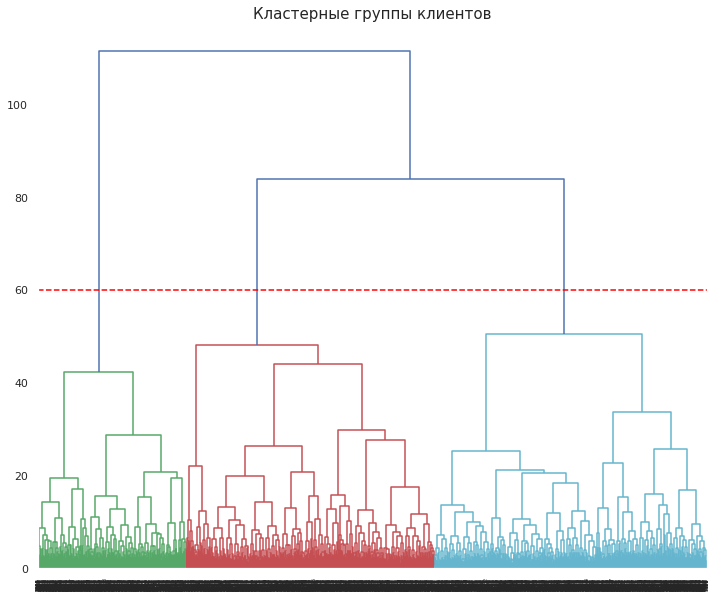

In [20]:
dendrogram(linked, orientation='top')
plt.axhline(y=60, color='red', linestyle = '--')
plt.title('Кластерные группы клиентов', fontsize=15)
plt.show()

На дендрограмме отчетливо выделены **3 кластерные группы клиентов**. 

Однако по условию проекта, для обучения модели с применением алгоритма K-Means, применяю число кластеров **n = 5**.

In [21]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X)
df['Кластер'] = labels
df['Кластер'].value_counts()

3    1408
1    1066
0     655
4     574
2     297
Name: Кластер, dtype: int64

<font color='blue'>Средние значения признаков для кластеров. Доля оттока</font>

- Сгруппирую данные по кластерам, посмотрю на средние значения признаков для каждого кластера;
- Отсортирую по возрастанию факта оттока клиентов.

In [22]:
df2 = df.groupby('Кластер').mean().sort_values(by='Факт оттока клиентов в текущем месяце').T
df2

Кластер,2,4,0,1,3
Пол,0.528620,0.487805,0.534351,0.523452,0.494318
Проживание или работа в районе фитнес-центра,0.872054,0.930314,0.908397,0.843340,0.776989
"Участие в программе ""Партнер клуба""",0.451178,0.724739,0.674809,0.419325,0.360795
"Участие в акции ""Приведи друга""",0.296296,0.486063,0.444275,0.284240,0.193892
Наличие контактного телефона клиента,0.861953,0.916376,0.897710,0.907129,0.906960
"Длительность текущего действующего абонемента, мес.",3.542088,12.000000,9.297710,2.651970,1.326705
Посещение групповых занятий,0.461279,0.541812,0.494656,0.410882,0.311790
Возраст,29.986532,29.893728,29.912977,30.056285,27.726562
Суммарная выручка от доп.услуг фитнес-центра,148.809168,162.256139,166.043641,156.961705,123.837928
"Срок до окончания текущего действующего абонемента, мес.",3.215488,10.804878,8.610687,2.539400,1.269176


# <font color='red'>Вывод</font> #

Только один признак - *Время с момента первого обращения в фитнес-центр, мес.* демонстрирует обратную зависимость с фактом оттока: с уменьшением времени с момента первого посещения фитнес-центров возрастает факт оттока клиентов по кластерам, в кластере, где наименьший отток - самые "старые" клиенты, посещающие фитнес центры в среднем около **12,6 месяцев**.

**Характеристика кластеров** (в порядке увеличения оттока клиентов):

<font color='green'>**Кластер 2 - кластер с наименьшим оттоком клиентов**</font>

- наименьший отток клиентов - около **0,3%**
- возраст клиентов в среднем **29,99 лет**
- **87%** клиентов проживают или работают в районе фитнес-центра
- **45%** клиентов участники программы "Партнер клуба"
- **29,6%** клиентов пришли по акции "Приведи друга"
- посещают фитнес центр в среднем **1,85-1,86 раз в неделю**
- **46%** клиентов посещают групповые занятия
- клиенты в среднем оформляют абонемент на **3,5 месяца**
    
<font color='green'>**Кластер 4 - наиболее стабильный кластер**</font>

- небольшой отток клиентов - около **1,4%**
- возраст клиентов в среднем **29,89 лет**
- **93%** клиентов проживают или работают в районе фитнес-центра
- **72%** клиентов участники программы "Партнер клуба"
- **48,6%** клиентов пришли по акции "Приведи друга"
- посещают фитнес-центр в среднем **2,66-2,67 раз в неделю**
- **54%** клиентов посещают групповые занятия
- клиенты в среднем оформляют абонемент **на 12 месяцев**
    
<font color='green'>**Кластер 0**</font>

- умеренный отток клиентов - около **7,5%**
- возраст клиентов в среднем **29,91 лет**
- **90,8%** клиентов проживают или работают в районе фитнес-центра
- **67,5%** клиентов участники программы "Партнер клуба"
- **44,4%** клиентов пришли по акции "Приведи друга"
- посещают фитнес-центр в среднем **0,96 - 0,99 раз в неделю**
- **49,5%** клиентов посещают групповые занятия
- клиенты в среднем оформляют абонемент на **9,3 месяца**
    
<font color='green'>**Кластер 1**</font>

- умеренный отток клиентов - около **10,6%**
- возраст клиентов в среднем **30,06 лет**
- **84,3%** клиентов проживают или работают в районе фитнес-центра
- **41,9%** клиентов участники программы "Партнер клуба"
- **28,4%** клиентов пришли по акции "Приведи друга"
- посещают фитнес-центр в среднем **2,77-2,78 раз в неделю**
- **41%** клиентов посещают групповые занятия
- клиенты в среднем оформляют абонемент на **2,65 месяца**
    
<font color='green'>**Кластер 3 - кластер с максимальным оттоком клиентов**</font>

- максимальный отток клиентов - около **63,2%**
- возраст клиентов в среднем **27,73 лет**
- **77,7%** клиентов проживают или работают в районе фитнес-центра
- **36,1%** клиентов участники программы "Партнер клуба"
- **19,4%** клиентов пришли по акции "Приведи друга"
- посещают фитнес центр в среднем **0,99-1,28 раз в неделю**
- **31,2%** клиентов посещают групповые занятия
- клиенты в среднем оформляют абонемент на **1,3 месяца**
    
- В четырех кластерных группах умеренный отток клиентов - от **0,3% до 10,6%**;
- Возраст клиентов в этих кластерах конфентрируется около **30 лет**;
- **От 84% до 93%** клиентов проживают и работают в районе фитнес-центров;
- **От 42% до 72 %** клиентов участники программы "Партнер клуба";
- **От 28% до 48 %** клиентов пришли по акции "Приведи друга";
- Длительность абонемента от **2,65 до 12 месяцев**;
- Посещений в неделю от **0,96 до 2,77 раз**. 

В кластере с максимальным оттоком (*кластер 3*) - **63,2%** клиентов - средние показатели перечисленных признаков заметно ниже:
- Возраст около **27 лет**;
- Вблизи фитнес-центра живут или работают около **78%** клиентов;
- **36%** являются участниками программы "Партнер клуба";
- **19%** клиентов пришли по акции "Приведи друга";
- Длительность абонемента в среднем **1,3 месяца**;
- Посещений в неделю - до **1,28 раз** в среднем.

*Неравномерное распределение* средних значений признаков по кластерам, *отсутствие четко прослеживаемых зависимостей* с фактом оттока (за исключением одного признака) говорит о **некорректном разбиении клиентов на 5 кластерных групп**. Учитывая, что на **дендрограмме четко прослеживается 3 кластерных группы**, повторю дополнительно обучение модели для 3 кластеров.

In [23]:
km = KMeans(n_clusters = 3, random_state = 0)
labels = km.fit_predict(X)
df['Кластер'] = labels
df['Кластер'].value_counts()
df3 = df.groupby('Кластер').mean().sort_values(by='Факт оттока клиентов в текущем месяце').T
df3

Кластер,1,0,2
Пол,0.509073,0.531778,0.495751
Проживание или работа в районе фитнес-центра,0.930444,0.849558,0.794334
"Участие в программе ""Партнер клуба""",0.718750,0.415125,0.406799
"Участие в акции ""Приведи друга""",0.483871,0.279163,0.230595
Наличие контактного телефона клиента,0.904234,0.903459,0.903116
"Длительность текущего действующего абонемента, мес.",11.727823,2.768302,2.067989
Посещение групповых занятий,0.544355,0.421561,0.331445
Возраст,29.895161,30.079646,28.154108
Суммарная выручка от доп.услуг фитнес-центра,165.599910,159.061368,127.924374
"Срок до окончания текущего действующего абонемента, мес.",10.676411,2.591311,1.971105


# <font color='red'>Вывод</font> #

Для всех признаков (исключая мультиколинеарные) наблюдается *обратная зависимость* с фактом оттока клиентов.

**Характеристика кластеров** (в порядке увеличения оттока клиентов)

<font color='green'>**Кластер 1 - кластер с наименьшим оттоком клиентов, максимальными средними показателями практически для каждого признака**</font>

- наименьший отток клиентов - около **0,2%**
- возраст клиентов в среднем **29,89 лет**
- **93%** клиентов проживают или работают в районе фитнес-центра
- **71,9%** клиентов участники программы "Партнер клуба"
- **48,3%** клиентов пришли по акции "Приведи друга"
- посещают фитнес-центр в среднем **1,96 раз в неделю**
- **54,4%** клиентов посещают групповые занятия
- клиенты в среднем оформляют абонемент на **11,7 месяцев**

<font color='green'>**Кластер 0 - достаточно стабильный кластер**</font>

- умеренный отток клиентов - около **7,9%**
- возраст клиентов в среднем **30,08 лет**
- **84,9%** клиентов проживают или работают в районе фитнес-центра
- **41,5%** клиентов участники программы "Партнер клуба"
- **27,9%** клиентов пришли по акции "Приведи друга"
- посещают фитнес-центр в среднем **2,7 раз в неделю** - **максимальный показатель** среди кластеров
- **42%** клиентов посещают групповые занятия
- клиенты в среднем оформляют абонемент на **2,8 месяцев**

<font color='green'>**Кластер 2 - кластер с максимальным оттоком клиентов**</font>

- максимальный отток клиентов - около **53,3%**
- возраст клиентов в среднем **28,15 лет**
- **79,4%** клиентов проживают или работают в районе фитнес-центра
- **40,7%** клиентов участники программы "Партнер клуба"
- **23,1%** клиентов пришли по акции "Приведи друга"
- посещают фитнес-центр в среднем **0,99 - 1,23 раз в неделю**
- **33,1%** клиентов посещают групповые занятия
- клиенты в среднем оформляют абонемент на **2,1 месяца**

Видно, что *длительность абонемента*, *факт проживания или работы в районе фитнес- центра*, *программа "Партнер клуба"* и *акция "Приведи друга"*, а также *участие в групповых занятиях* качественнее удерживают клиентов, в кластерах, где высоки показатели по данным признакам - отток клиентов ниже.

<font color='blue'>Гистограммы распределение признаков для кластеров</font>

С помощью гистограммы посмотрю на распределение значений признаков для каждого из 3-х кластеров

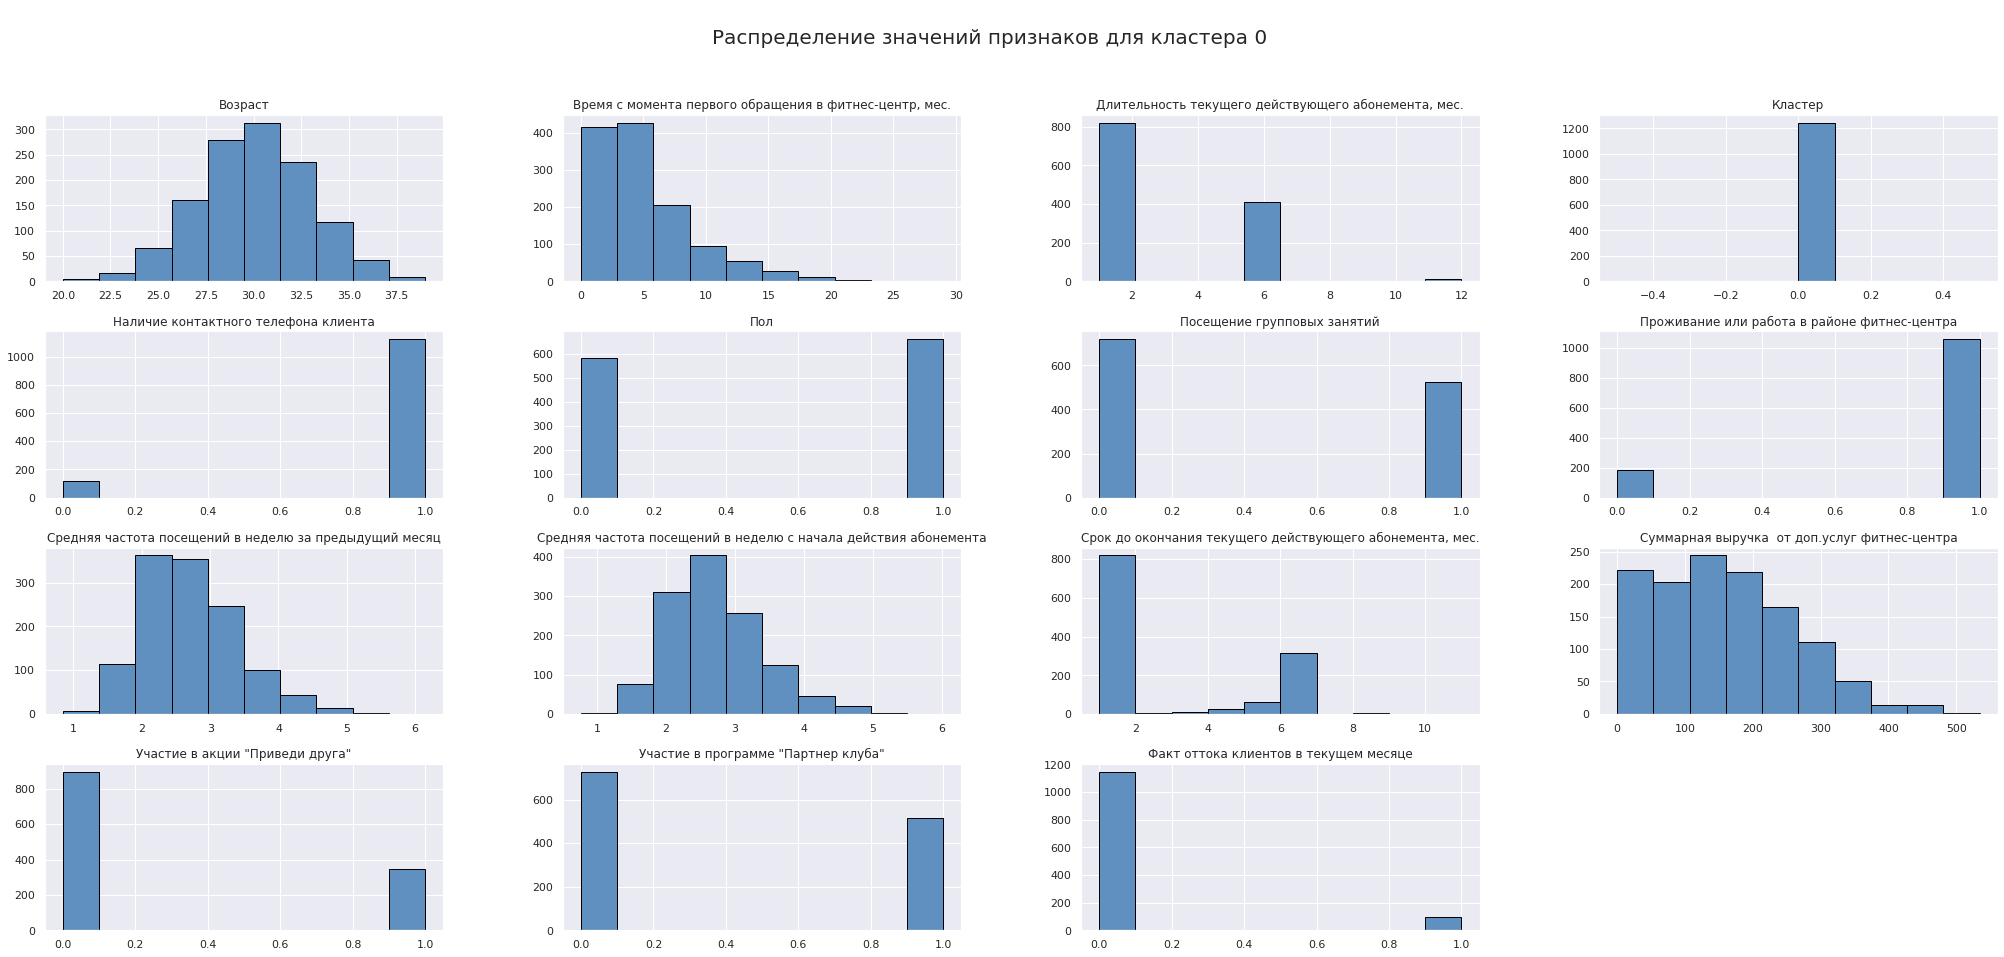

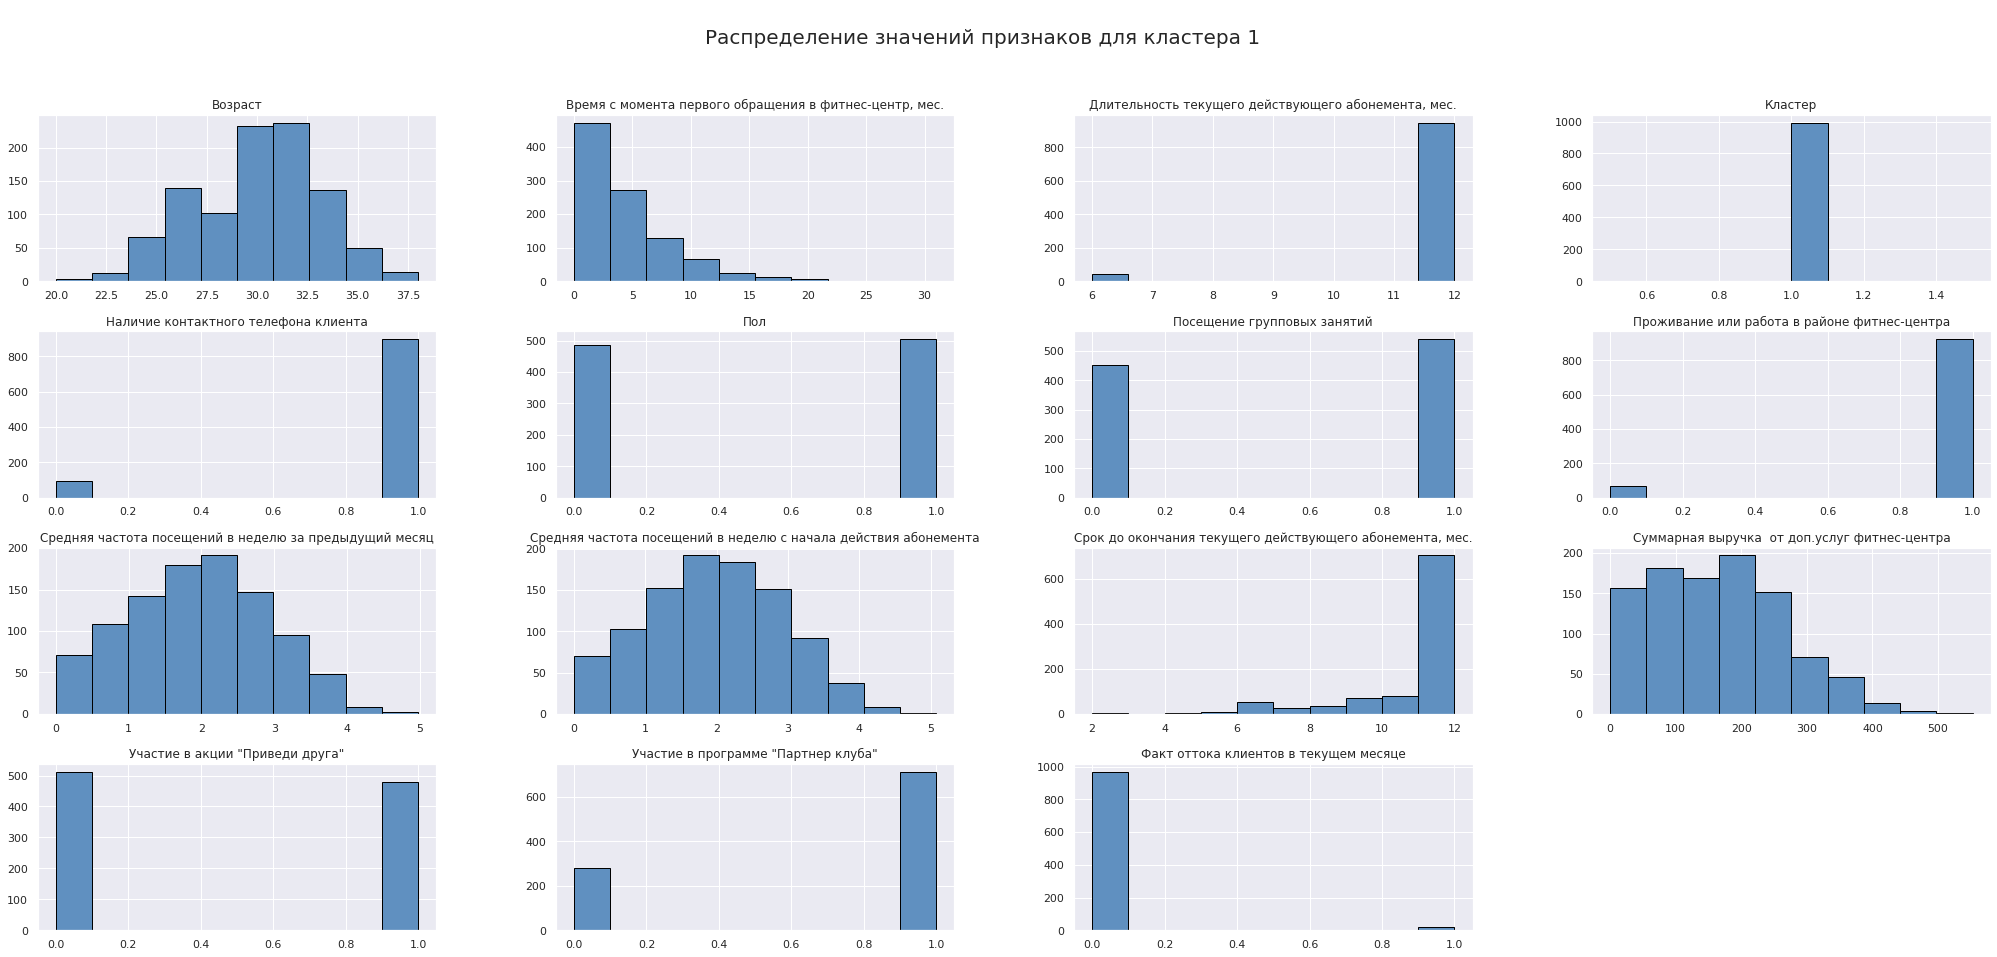

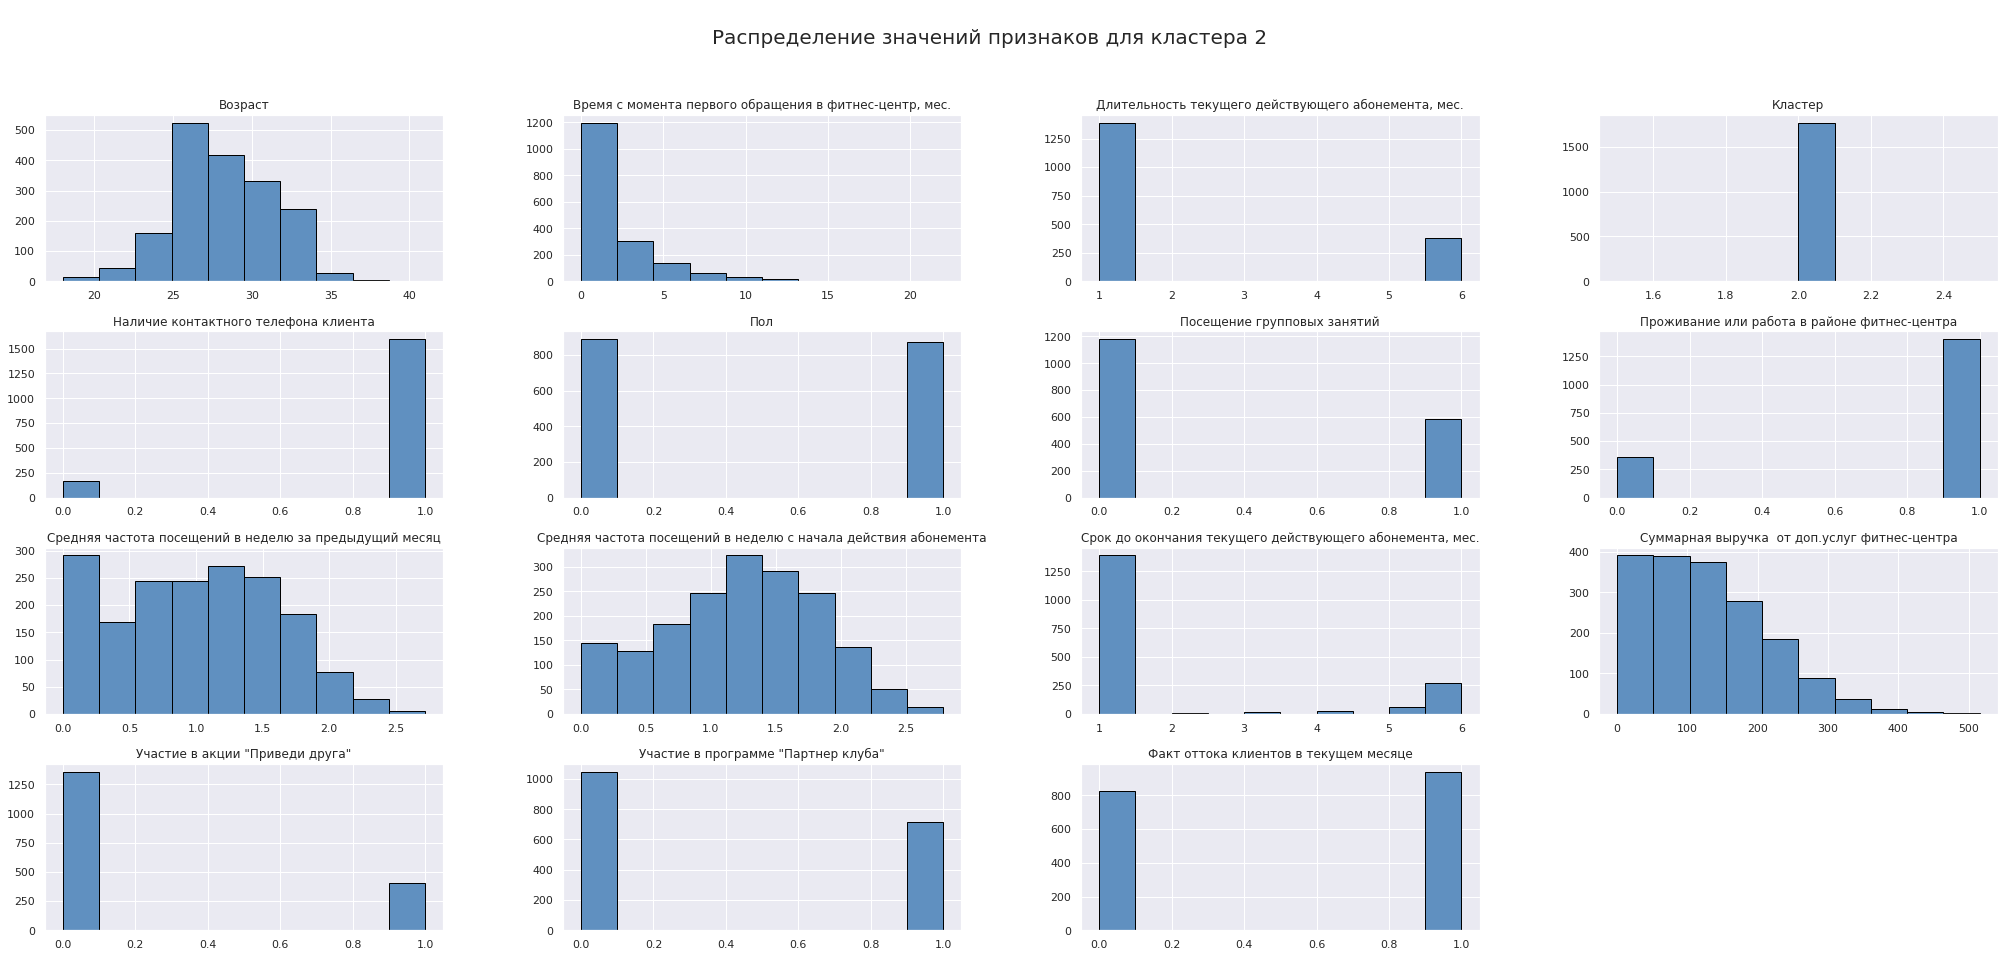

In [24]:
for value in [0, 1, 2]:
  df[df['Кластер']==value].hist(figsize=(35,15), ec='black', color = '#6090C0')
  plt.suptitle('\nРаспределение значений признаков для кластера {}'.format(value), fontsize = 20)
  plt.show()

# <a id="vyvod"></a><font style="background-color: Cyan; color=black">5. Общий вывод</font> #

<font color='purple'>**Исходные данные**</font>

Для исследования и построения моделей машинного обучения был изучен датасет со сведениями о клиентах, с данными на месяц до оттока и фактом оттока на определенный месяц. Проблем в качестве данных *не выявлено*. В ходе исследования столбцы датасета были переименованы для удобства визуализации.

По итогу анализа были получены следующие **результаты**:

<font color='purple'>**Средние значения и стандартные отклонения:**</font>

- Распределение по полу: **51% на 49%** - примерно *одинаковое количество женщин и мужчин* посещают фитнес-центры.

- Около **85%** клиентов живет или работает *рядом с фитнес-центром*.

- Почти **49%** клиентов являются *сотрудниками компаний-партнеров сети фитнес-центров*.

- Почти **31%** клиентов оплатили первый абонемент *по промокоду* от знакомого, в рамках программы "Приведи друга".

- **90%** клиентов оставили контактные номера телефонов.

- *Длительность текущего действующего абонемента* клиента в среднем равна **4.68 месяцев**, стандартное отклонение - **4,55**(учитывая наличие разных типов абонементов - на 1 месяц, на 3 и 6 месяцев, на год - вполне логичный остаточный срок)

- Около **41%** клиентов посещали *групповые занятия*.

- *Средний возраст* клиентов - **29 лет**.

- Стандартное отклонение **3,25** наблюдается в информации о возрасте клиентов. Заметный разброс возрастов. Однако показатель в целом небольшой, скорее всего возрастные категории клиентов фитнес-центров охватывают только активный работоспособный возраст.

- Средние *суммарные траты на дополнительные услуги* - **146.94**. Стандартное отклонение - **96,36** - большое значение. Наверняка имеются выбросы, но и это легко объяснимо, так как во всех фитнес-центрах встречаются любители не только тренировок, но и те, кто охотно посидит в кафе, сходит в салон-красоты и оставит круглую сумму.

- *Срок до окончания текущего действующего абонемента* в среднем **4,3 месяцев**, стандартное отклонение - **4,19** - имеется заметный разброс значений (от 1 до 12 месяцев, вероятно).

- *Время с момента первого обращения в фитнес-центр* в среднем - **3.7 месяцев**, стандартное отклонение - **3,75** - имеется заметный разброс значений.

- *Средняя частота посещений за время с начала действия абонемента* - **1.88** раз в неделю, стандартное отклонение - **0,97**. Большинство клиентов посещают фитнес- центр не более 2 раз в неделю (распространенная практика для фитнес-центров).

- *Средняя частота посещений за предыдущий месяц* - **1.76** раз в неделю, стандартное отклонение равно **1,05** - в сравнении с частотой посещений за все время оно выше, разброс значений больше.

- *Доля оттока* клиентов в текущем месяце в среднем **27%**.

<font color='purple'>**Анализ данных в разрезе двух групп - клиенты, которые ушли в отток и клиенты, которые остались:**</font>

<font color='purple'>**Средние значения признаков по группам: ушли в отток / остались**</font>

- Распределение *по полу* в двух группах (ушли в отток / остались) практически одинаковое - **51% на 49%**.

- В группе *оттока* процент клиентов, которые *живут или работает рядом с фитнес-центром* на **11 % ниже**, чем в группе оставшихся клиентов, что логично.

- Процент клиентов, *котрые являются сотрудниками компаний-партнеров* сети фитнес-центров в группе *оттока* заметно **ниже**, чем в группе оставшихся **35,5%** и **53%** соответственно (возможно, для партнеров действуют скидки).

- В группе *оттока* только **18%** клиентов пришли в фитнес-центры *по программе "Приведи друга"*, в группе оставшихся процент участников программы выше почти в два раза - **35%**.

- *Контактные номера телефонов* оставлены в двух группах на **одном уровне - у 90 % клиентов**.

- *Длительность текущего действующего абонемента* клиента из группы оставшихся в среднем равна **5,7 месяцев**, в группе *оттока* значительно **ниже - 1,7 месяцев** (можно предположить, что клиенты, которые уходят сомневаются в том, что будут ходить много и долго, и изначально не берут абонементы на год, или даже на пол года).

- В группе оставшихся **46%** клиентов посещали *групповые занятия*, в группе оттока - только **26%**.

- *Средний возраст клиентов* в группе *оставшихся* около **30 лет**, клиенты в группе *оттока* моложе - в среднем около **27 лет**.

- Каждый клиент в среднем *суммарно тратит на дополнительные услуги* фитнес-центров в группе *оставшихся* около **158**, в группе *оттока* - **115**.

- *Срок до окончания текущего действующего абонемента* в группе *оставшихся* в среднем **5,3 месяца**, в группе *оттока* - **1,7 месяцев** (клиенты уходят даже не использовав абонемент в полном объеме).

- Время *с момента первого обращения в фитнес-центр* в группе *оставшихся* в среднем **4,7 месяцев**, в группе *оттока* - около **1 месяца** (клиенты не выдерживают даже месяц. Вероятно, попробовали - не понравилось, слабая мотивация, абонемент подарили или отдали).

- *Средняя частота посещений* за время с начала действия абонемента в группе *оставшихся* выше **2**, чем в группе *оттока* **1,47** раз в неделю.

<font color='purple'>**Распределение признаков по группам: ушли в отток / остались**</font>

<font color='green'>**Возраст**</font>

- *Отток клиентов*: распределение от **18 до 36 лет**, большинство клиентов в возрасте **25 - 30 лет**
- *Оставшиеся клиенты*: распределение от **21 до 38 лет**, большинство клиентов в возрасте **27 - 33 лет**.

<font color='green'>**Время с момента первого обращения в фитнес-центр, мес**</font>

- *Отток клиентов*: распределение от нескольких дней **(около 20) до 6 месяцев**, единично - **до 9 месяцев**, большинство клиентов - **от 0 до 3 месяцев**
- *Оставшиеся клиенты*: распределение от **0 до 15 месяцев**, единично - **до 33 месяцев**, большинство клиентов - от **0 до 5 месяцев**.

<font color='green'>**Длительность текущего действующего абонемента**</font>

- *Отток клиентов*: распределение абонементов - **1, 6, 12 месяцев**, большинство клиентов имеют абонемент на **1 месяц**
- *Оставшиеся клиенты*: распределение абонементов в близком диапазоне - **1, 6, 12 месяцев**, большинство клиентов имеют абонемент на **1 и 12 месяцев**.

<font color='green'>**Срок до окончания текущего действующего абонемента, мес.**</font>

- *Отток клиентов*: распределение от **1 до 12 месяцев**, у большинства клиентов срок окончания абонемента около **1 месяца**
- *Оставшиеся клиенты*: распределение от **1 до 12 месяцев**, у большинства клиентов срок окончания абонемента около **1 или 11 месяцев**

<font color='green'>**Средняя частота посещений в неделю с начала действия абонемента**</font>

- *Отток клиентов*: распределение от **0 до 3 раз (очень редко чаще)**, большинство клиентов в среднем посещают фитнес-центр **1,5 - 1,7 раз в неделю**
- *Оставшиеся клиенты*: распределение от **0 до 5 раз (очень редко чаще)**, большинство клиентов в среднем посещают фитнес-центр **1,5 - 2,8 раз в неделю**.

<font color='green'>**Средняя частота посещений в неделю за предыдущий месяц**</font>

- *Отток клиентов*: распределение от **0 до 3 раз (редко чаще)**, большинство клиентов за предыдущий месяц в среднем посещали фитнес-центр **1 раз в неделю**
- *Оставшиеся клиенты*: распределение от **0 до 5 раз** (очень редко чаще), большинство клиентов за предыдущий месяц в среднем посещали фитнес-центр **1-3 раза в неделю**

<font color='green'>**Суммарная выручка от доп.услуг фитнес-центра**</font>

- *Отток клиентов*: распределение от **0 до 300 (редко больше)**, большинство клиентов принесли в среднем выручку по дополнительным услугам от **0 до 150**.
- *Оставшиеся клиенты*: распределение от **0 до 500 (редко больше)**, большинство клиентов принесли в среднем выручку по дополнительным услугам от **0 до 200**.

<font color='green'>**Пол**</font>

- Распределение по полу примерно **одинаково** в обеих группах

<font color='green'>**Факт проживания или работы в районе фитнес- центра**</font>

- **Абсолютное большинство** клиентов в обеих группах проиживают или работают в районе фитнес- центра

<font color='green'>**Факт участия в программе "Партнер клуба**</font>

- *Большинство* участников программы "Партнер клуба" в группе **оставшихся** клиентов

<font color='green'>**Факт участия в акции "Приведи друга"**</font>

- *Большинство* участников акции "Приведи друга" в группе **оставшихся** клиентов

<font color='green'>**Факт наличия контактного телефона клиента**</font>

- В обеих группах большинство клиентов **оставляют** свой контактный телефон

<font color='green'>**Факт посещения групповых занятий**</font>

- Из клиентов, посещающих групповые занятия, *большинство* в группе **оставшихся**

<font color='green'>**Факт оттока клиентов в текущем месяце**</font>

- *Чуть менее 1/3 части* клиентов попала в группу **оттока**

<font color='purple'>**Целевая переменная (факт оттока)**</font> очень слабо *отрицательно коррелирует* с половиной признаков, с признаками "Пол" и "Контактный телефон" корреляция *нулевая*, заметная *отрицательная корреляция* (возрастание значений признака приводит к снижению оттока) с целевой переменной имеется у следующих признаков:

- *Длительность текущего действующего абонемента, мес.*, корреляция равна - **0,39**
- *Возраст*, корреляция равна - **0,40**
- *Срок до окончания текущего действующего абонемента, мес.*, корреляция равна - **0,38**
- *Время с момента первого обращения в фитнес- центр, мес.*, корреляция равна - **0,44**
- *Средняя частота посещений в неделю за предыдущий месяц*, корреляция равна - **0,41**

Выявлены <font color='purple'>**мультиколлинеарные**</font> признаки:

- корреляция между ними равна **0,97** - *Длительность текущего действующего абонемента, мес.* (contract_period) и *Срок до окончания текущего действующего абонемента, мес.* (month_to_end_contact);
- корреляция между ними равна **0,95** - *Средняя частота посещений в неделю с начала действия абонемента*(avg_class_frequency_current_month) и *Средняя частота посещений в неделю за предыдущий месяц* (avg_class_frequency_total).

<font color='purple'>**Метрики для модели логистической регрессии:**</font>

- Доля правильных ответов (*Accuracy*): **0,93**
- Точность (*Precision*): **0,86**
- Полнота (*Recall*): **0,83**

<font color='purple'>**Метрики для модели случайного леса:**</font>

- Доля правильных ответов (*Accuracy*): **0,92**
- Точность (*Precision*): **0,84**
- Полнота (*Recall*): **0,81**

*Доля правильных ответов*, *полнота* и *точность* выше в моделе, обученной способом **логистической регрессии** - данная модель показала лучший результат.

<font color='purple'>**Кластеризация клиентов**</font>

По условию проекта, для обучения модели с применением алгоритма K-Means, было определено число кластеров *n = 5*. В итоге только один признак - *Время с момента первого обращения в фитнес-центр, мес.* демонстрирует *обратную зависимость с фактом оттока*: с уменьшением времени с момента первого посещения фитнес-центров возрастает факт оттока клиентов по кластерам, в кластере, где наименьший отток - самые "старые" клиенты, посещающие фитнес центры в среднем около 12,6 месяцев.

В четырех кластерных группах следующие показатели:
- умеренный отток клиентов - *от 0,3% до 10,6%*,
- возраст клиентов в этих кластерах конфентрируется около *30 лет*,
- *от 84% до 93%* клиентов проживают и работают в районе фитнес-центров,
- *от 42% до 72%* клиентов участники программы "Партнер клуба",
- *от 28% до 48%* клиентов пришли по акции "Приведи друга",
- длительность абонемента *от 2,65 до 12 месяцев*,
- посещений в неделю *от 0,96 до 2,77 раз*.

В кластере с максимальным оттоком (кластер 3) - 63,2% клиентов - средние показатели перечисленных признаков заметно ниже:
- возраст около *27 лет*, 
- вблизи фитнес-центра живут или работают около *78%* клиентов, 
- только *36%* являются участниками программы "Партнер клуба", 
- только *19%* клиентов пришли по акции "Приведи друга", 
- длительность абонемента в среднем *1,3 месяца*, 
- посещений в неделю - до *1,28 раз* в среднем.

Неравномерное распределение средних значений признаков по кластерам, отсутствие четко прослеживаемых зависимостей с фактом оттока (за исключением одного признака) говорит о *некорректном разбиении клиентов на 5 кластерных групп*. Учитывая, что на дендрограмме четко прослеживается 3 кластерных группы, дополнительно было проведено обучение модели для *3 кластеров*.

Для всех признаков (исключая мультиколлинеарные) наблюдается обратная зависимость с фактом оттока клиентов.

<font color='purple'>**Характеристика кластеров** (в порядке увеличения оттока клиентов)</font>

<font color='green'>**Кластер 1 - кластер с наименьшим оттоком клиентов, максимальными средними показателями практически для каждого признака**</font>

- наименьший отток клиентов - около **0,2%**
- возраст клиентов в среднем **29,89 лет**
- **93%** клиентов проживают или работают в районе фитнес-центра
- **71,9%** клиентов участники программы "Партнер клуба"
- **48,3%** клиентов пришли по акции "Приведи друга"
- посещают фитнес-центр в среднем **1,96 раз в неделю**
- **54,4%** клиентов посещают групповые занятия
- клиенты в среднем оформляют абонемент на **11,7 месяцев**

<font color='green'>**Кластер 0 - достаточно стабильный кластер**</font>

- умеренный отток клиентов - около **7,9%**
- возраст клиентов в среднем **30,08 лет**
- **84,9%** клиентов проживают или работают в районе фитнес-центра
- **41,5%** клиентов участники программы "Партнер клуба"
- **27,9%** клиентов пришли по акции "Приведи друга"
- посещают фитнес-центр в среднем **2,7 раз в неделю** - **максимальный показатель** среди кластеров
- **42%** клиентов посещают групповые занятия
- клиенты в среднем оформляют абонемент на **2,8 месяцев**

<font color='green'>**Кластер 2 - кластер с максимальным оттоком клиентов**</font>

- максимальный отток клиентов - около **53,3%**
- возраст клиентов в среднем **28,15 лет**
- **79,4%** клиентов проживают или работают в районе фитнес-центра
- **40,7%** клиентов участники программы "Партнер клуба"
- **23,1%** клиентов пришли по акции "Приведи друга"
- посещают фитнес-центр в среднем **0,99 - 1,23 раз в неделю**
- **33,1%** клиентов посещают групповые занятия
- клиенты в среднем оформляют абонемент на **2,1 месяца**

Видно, что *длительность абонемента*, *факт проживания или работы в районе фитнес- центра*, *программа "Партнер клуба"* и *акция "Приведи друга"*, а также *участие в групповых занятиях* качественнее удерживают клиентов, в кластерах, где высоки показатели по данным признакам - отток клиентов ниже.

# <a id="recomend"></a><font style="background-color: Cyan; color=black">6. Рекомендации для сотрудников фитнес-центра</font> #

- Продолжить поддержку мотивации клиентов из кластеров с низким и умеренным оттоком;
- Сконцентрироваться на клиентах "группы риска", в кластере с максимальным оттоком; 
- Рассмотреть вопрос о внедрении абонементов со сроком действия 1, 3, 6 месяцев с неограниченным посещением фитнес-клубов в неделю;
- Провести акции для продажи абонементов с длительным сроком действия;
- Предлагать клиентам участие в групповых занятиях;
- Обеспечить индивидуальный подход.

На основе данных клиентов из кластеров с низким и умеренным оттоком:
- Разработать рекламные предложения для определенных групп в социальных сетях;
- Рассмотреть вопрос о расширении программы партнерства;
- Внедрить систематическое отслеживание движения клиентов между кластерами, действовать превентивно.